In [1]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
# DATA UNDERSTANDING

In [4]:
# Dataset

In [5]:
df = pd.read_csv('/Users/sai/Desktop/MLLab1/data.csv', sep=';') 
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sai/Desktop/MLLab1/data.csv'

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
 
# variable information 
df_var = predict_students_dropout_and_academic_success.variables
df_var

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


In [ ]:
print(df.dtypes)

Marital status                                     object
Course                                             object
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Nationality                                        object
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollment                                   int64
International                                       int64
Curricular uni

In [ ]:
# The data information and data types from the original dataset are as listed above.

# For the most part, it would be best to represent each data attribute the way it's listed, but the 
# following attributes would benefit from using a different data type:
#    Marital status: string instead of int
#    Course: string instead of int
#    Nationality: string instead of int

# For these variables, it would be best to work with them as integers, but they are thought of as booleans:
#    Displaced, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, International

# The following data attributes will not contribute meaninfully to our analysis:
#    Application mode, Application order, Admission grade, Previous qualification (grade)

In [ ]:
# Restatement of descriptions as they got cut off:

# Marital status: 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
# Application mode: 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)
# Application order: Application order (between 0 - first choice; and 9 last choice)
# Course: 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)
# Daytime/evening attendance: 1 – daytime 0 - evening
# Previous qualification: 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)
# Previous qualification (grade): Grade of previous qualification (between 0 and 200)
# Nationality: 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian
# Mother's qualification: 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
# Father's qualification: 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
# Mother's occupation: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
# Father's occupation: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
# Admission grade: Admission grade (between 0 and 200)
# Displaced: 1 – yes 0 – no
# Educational special needs: 1 – yes 0 – no
# Debtor: 1 – yes 0 – no
# Tuition fees up to date: 1 – yes 0 – no
# Gender: 1 – male 0 – female
# Scholarship holder: 1 – yes 0 – no
# Age at enrollment: Age of studend at enrollment
# International: 1 – yes 0 – no
# Curricular units 1st sem (credited): Number of curricular units credited in the 1st semester
# Curricular units 1st sem (enrolled): Number of curricular units enrolled in the 1st semester
# Curricular units 1st sem (evaluations): Number of evaluations to curricular units in the 1st semester
# Curricular units 1st sem (approved): Number of curricular units approved in the 1st semester	
# Curricular units 1st sem (grade): Grade average in the 1st semester (between 0 and 20)
# Curricular units 1st sem (without evaluations): Number of curricular units without evalutions in the 1st semester
# Curricular units 2nd sem (credited): Number of curricular units credited in the 2nd semester	
# Curricular units 2nd sem (enrolled): Number of curricular units enrolled in the 2nd semester	
# Curricular units 2nd sem (evaluations): Number of evaluations to curricular units in the 2nd semester
# Curricular units 2nd sem (approved): Number of curricular units approved in the 2nd semester	
# Curricular units 2nd sem (grade): Grade average in the 2nd semester (between 0 and 20)	
# Curricular units 2nd sem (without evaluations): Number of curricular units without evalutions in the 1st semester
# Unemployment rate: Unemployment rate (%)
# Inflation rate: Inflation rate (%)
# GDP: GDP
# Target: Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the courseing

In [ ]:
# NOT NECESSARY

# 37 features, or data attributes

# Marital status: string
# Application mode: ???
# Course: string
# Daytime/evening attendance: boolean
# Previous qualification: int
# Previous qualification (grade): ???
# Nationality: string
# Mother's qualification: int
# Father's qualification: int
# Mother's occupation: int
# Father's occupation: int
# Admission grade: int ???
# Displaced: boolean
# Educational special needs: boolean
# Debtor: boolean
# Tuition fees up to date: boolean
# Gender: int
# Scholarship holder: boolean
# Age at enrollment: int
# International: boolean
# Curricular units 1st sem (credited): int
# Curricular units 1st sem (enrolled): int
# Curricular units 1st sem (evaluations): int
# Curricular units 1st sem (approved): int
# Curricular units 1st sem (grade): int
# Curricular units 1st sem (without evaluations): int
# Curricular units 2nd sem (credited): int
# Curricular units 2nd sem (enrolled): int
# Curricular units 2nd sem (evaluations): int
# Curricular units 2nd sem (approved): int
# Curricular units 2nd sem (grade): int
# Curricular units 2nd sem (without evaluations): int
# Unemployment rate: double
# Inflation rate: double
# GDP: double
# Target: string

In [ ]:
# Data quality

In [ ]:
idx = df.duplicated()
len(df[idx])

# There are no missing values in this dataset, as indicated by the data editor on dataset information page 
#     from the UCI Irvine website

# There are no duplicate data values in this dataset

0

In [ ]:
# Imputation: replacing all course numbers with course names because the numbers aren't hierarchical, and the names
#    are more meaningful, as we can analyze the difficulty of the concepts

df["Course"].replace(to_replace = [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
                    value = ["Biofuel production", "Animation and multimedia", "Social service (evening)", "Agronomy", "Communication design", "Veterinary nursing", 
                            "Informatics engineering", "Equinculture", "Management", "Social service", "Tourism", "Nursing", "Oral hygiene", "Advertising and marketing management",
                            "Journalism and communication", "Basic Education", "Management (evening)"], inplace = True)

df["Course"]

0           Animation and multimedia
1                            Tourism
2               Communication design
3       Journalism and communication
4           Social service (evening)
                    ...             
4419    Journalism and communication
4420    Journalism and communication
4421                         Nursing
4422                      Management
4423    Journalism and communication
Name: Course, Length: 4424, dtype: object

In [ ]:
# Imputation: correct the mispelling of "Nationality"

# Imputation: replacing all nationality numbers with nationality names because the numbers aren't hierarchical, and the names
#    are more meaningful, as we can analyze where students come from

df.rename(columns = {"Nacionality":"Nationality"}, inplace = True)

df["Nationality"].replace(to_replace = [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
                         value = ["Portuguese", "German", "Spanish", "Italian", "Dutch", "English", "Lithuanian", "Angolan", "Cape Verdean", 
                                  "Guinean", "Mozambican", "Santomean", "Turkish", "Brazillian", "Romanian", "Rep. of Moldova", "Mexican", "Ukranian", 
                                  "Russian", "Cuban", "Colombian"], inplace = True)
df["Nationality"]

0         Portuguese
1         Portuguese
2         Portuguese
3         Portuguese
4         Portuguese
            ...     
4419      Portuguese
4420         Russian
4421      Portuguese
4422      Portuguese
4423    Cape Verdean
Name: Nationality, Length: 4424, dtype: object

In [ ]:
# Imputation: make casing of variable name consistent with others

# Imputation: replacing all marital status numbers with marital status names because the numbers aren't hierarchical, and the names
#    are more meaningful, as we can analyze a student's marital status categorically

df.rename(columns = {"Marital Status":"Marital status"}, inplace = True)

df["Marital status"].replace(to_replace = [1, 2, 3, 4, 5, 6],
                         value = ["single", "married", "widower", "divorced", "facto union", "legally separated"], inplace = True)

In [ ]:
# Imputation: removed all rows with students "Enrolled" in order to focus on outcomes ("Graduates" and "Dropouts")

df = df.drop(df[df["Target"] == "Enrolled"].index)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,17,5,Animation and multimedia,1,1,122.0,Portuguese,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,Tourism,1,1,160.0,Portuguese,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,Communication design,1,1,122.0,Portuguese,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,Journalism and communication,1,1,122.0,Portuguese,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,Social service (evening),0,1,100.0,Portuguese,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and communication,1,1,125.0,Portuguese,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1,2,Journalism and communication,1,1,120.0,Russian,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1,1,Nursing,1,1,154.0,Portuguese,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1,1,Management,1,1,180.0,Portuguese,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Imputation: remove attributes that are not necessary

# The following data attributes will not contribute meaninfully to our analysis:
#    Application mode, Application order, Admission grade, Previous qualification (grade)

df = df.drop("Application mode", axis = 1)
df = df.drop("Application order", axis = 1)
df = df.drop("Previous qualification (grade)", axis = 1)
df = df.drop("Admission grade", axis = 1)

df

,Marital status,Course,Daytime/evening attendance\t,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,Animation and multimedia,1,1,Portuguese,19,12,5,9,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,Tourism,1,1,Portuguese,1,3,3,3,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,Communication design,1,1,Portuguese,37,37,9,9,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,Journalism and communication,1,1,Portuguese,38,37,5,3,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Social service (evening),0,1,Portuguese,37,38,9,9,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,Journalism and communication,1,1,Portuguese,1,1,5,4,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,Journalism and communication,1,1,Russian,1,1,9,9,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,Nursing,1,1,Portuguese,37,37,9,9,1,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,Management,1,1,Portuguese,37,37,7,4,1,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Numerical data summary of all variables with numerical values (categorical variables excluded)

In [ ]:
# Data summary: 18 attributes

summary1 = df.iloc[0:, 0:20]
summary1.describe()

,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations)
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.887603,4.532231,19.986226,22.571625,10.138567,10.28292,0.549036,0.011019,0.113774,0.866116,0.344077,0.266942,23.461157,0.023691,0.754270,6.337466,8.071074
std,0.315897,10.024134,15.585278,15.275453,23.315697,22.40269,0.497658,0.104407,0.317580,0.340575,0.475132,0.442423,7.827994,0.152107,2.477277,2.570773,4.286632
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,4.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000
50%,1.000000,1.000000,19.000000,19.000000,5.000000,7.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000
75%,1.000000,1.000000,37.000000,37.000000,9.000000,9.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,7.000000,10.000000
max,1.000000,43.000000,44.000000,44.000000,194.000000,195.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000


In [ ]:
# Data summary: 16 attributes

summary2 = df.iloc[0:, 20:38]
summary2.describe()

,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,4.791460,10.534860,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,3.237845,5.057694,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,5.000000,12.341429,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,6.000000,13.500000,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
# Data summary needed to be expressed this way because all the attributes wouldn't fit in one display ("..." in the middle hid values)

In [ ]:
print(df.dtypes)

Marital status                                     object
Course                                             object
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Nationality                                        object
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollment                                   int64
International                                       int64
Curricular uni

In [ ]:
df.describe()

,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.887603,4.532231,19.986226,22.571625,10.138567,10.28292,0.549036,0.011019,0.113774,0.866116,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.315897,10.024134,15.585278,15.275453,23.315697,22.40269,0.497658,0.104407,0.317580,0.340575,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,2.000000,3.000000,4.000000,4.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,1.000000,19.000000,19.000000,5.000000,7.00000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,1.000000,37.000000,37.000000,9.000000,9.00000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,1.000000,43.000000,44.000000,44.000000,194.000000,195.00000,1.000000,1.000000,1.000000,1.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
# DATA VISUALIZATIONS

In [ ]:
grad = 0
drop = 0
none = 0

for x in df["Target"]:
    if x == "Graduate":
        grad += 1
    elif x == "Dropout":
        drop += 1
    else:
        none += 1
        
print("Number of graduates: ", grad)
print("Number of dropouts: ", drop)
print("Other: ", none, " (checking for extraneous data, there is none)")
print("Total number of students: ", (grad + drop + none), "(total matches number of rows)")
print("---------------------------")
print("The overall rate (%) of dropout is", (100 * (drop/(grad + drop))), "%.")
print("The overall rate (%) of graduation is", (100 * (grad/(grad + drop))), "%.")


Number of graduates:  2209
Number of dropouts:  1421
Other:  0  (checking for extraneous data, there is none)
Total number of students:  3630 (total matches number of rows)
---------------------------
The overall rate (%) of dropout is 39.146005509641874 %.
The overall rate (%) of graduation is 60.85399449035813 %.


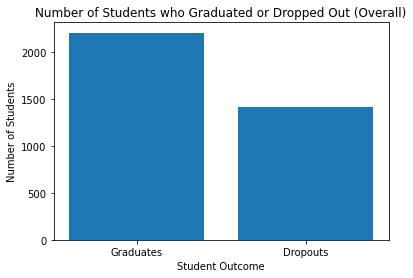

In [ ]:
df_target_labs = ["Graduates", "Dropouts"]
df_target_vals = [grad, drop]

plt.bar(df_target_labs, df_target_vals)
plt.xlabel("Student Outcome")
plt.ylabel("Number of Students")
plt.title("Number of Students who Graduated or Dropped Out (Overall)")
plt.show()

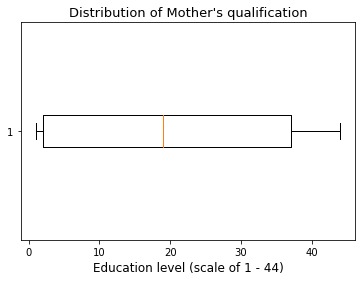

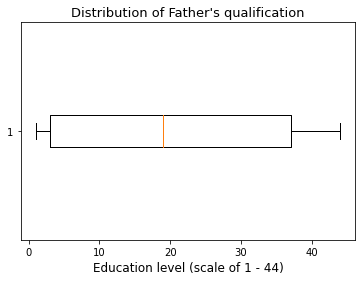

In [ ]:
# Histogram: qualifications

# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 15), sharey=True)

plt.boxplot(df["Mother's qualification"], vert = False)
plt.title("Distribution of Mother's qualification", fontsize = 13)
plt.xlabel("Education level (scale of 1 - 44)", fontsize = 12)
plt.show()

plt.boxplot(df["Father's qualification"], vert = False)
plt.title("Distribution of Father's qualification", fontsize = 13)
plt.xlabel("Education level (scale of 1 - 44)", fontsize = 12)
plt.show()



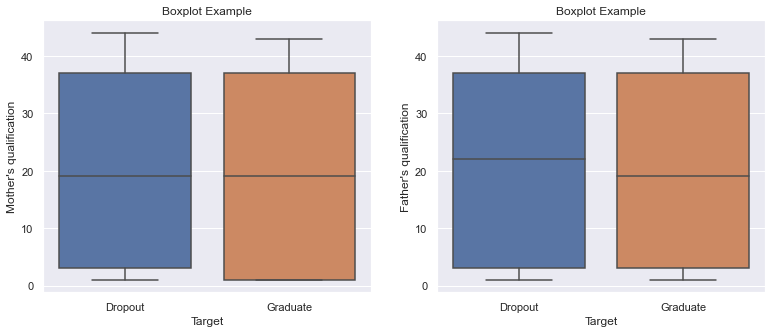

In [ ]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,3,1)
sb.boxplot(x = df["Target"], y = df["Mother's qualification"], data = df)
plt.title('Boxplot Example')

plt.subplot(1,3,2)
sb.boxplot(x = df["Target"], y = df["Father's qualification"], data = df)
plt.title('Boxplot Example')

plt.show()

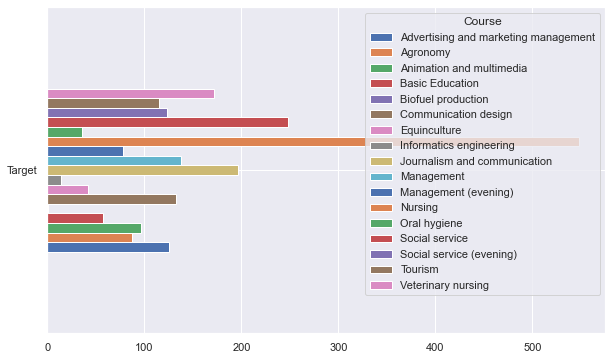

In [ ]:
df_subset = df[["Course", "Target"]]
df_subset["Target"].replace(to_replace = ["Graduate", "Dropout"],
                         value = [1, 0], inplace = True)

df_grouped = df_subset.groupby("Course").sum()

df_grouped = df_grouped.T

df_grouped.plot(kind = 'barh', figsize=(10, 6))

plt.show()





# plt.bar(df_grouped.apply(np.unique), df_grouped.sum())

In [ ]:
print(df_grouped.sum())

Course
Advertising and marketing management    125
Agronomy                                 87
Animation and multimedia                 96
Basic Education                          57
Biofuel production                        1
Communication design                    133
Equinculture                             42
Informatics engineering                  14
Journalism and communication            196
Management                              138
Management (evening)                     78
Nursing                                 548
Oral hygiene                             36
Social service                          248
Social service (evening)                123
Tourism                                 115
Veterinary nursing                      172
dtype: int64


In [ ]:
single = 0
married = 0
widower = 0
divorced = 0
facto_union = 0
legally_separated = 0
none = 0

for x in df["Marital status"]:
    if x == "single":
        single += 1
    elif x == "married":
        married += 1
    elif x == "widower":
        widower += 1
    elif x == "divorced":
        divorced += 1
    elif x == "facto union":
        facto_union += 1
    elif x == "legally separated":
        legally_separated += 1
    else:
        none += 1
        
print(single, married, widower, divorced, facto_union, legally_separated, none)

3199 327 2 75 22 5 0


<BarContainer object of 2 artists>

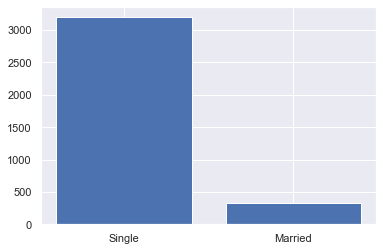

In [ ]:
married_label = ["Single", "Married"]
married_count = [single, married]

plt.bar(married_label, married_count)

In [ ]:
female = 0
male = 0
none = 0

for x in df["Gender"]:
    if x == 0:
        male += 1
    elif x == 1:
        female += 1
    else:
        none += 1

<BarContainer object of 2 artists>

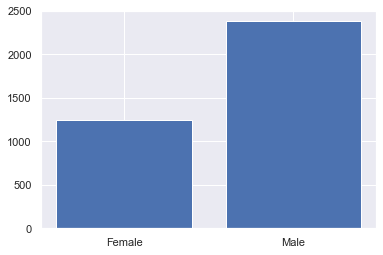

In [ ]:
gender_label = ["Female", "Male"]
gender_count = [female, male]

plt.bar(gender_label, gender_count)

Target                 Dropout  Graduate
Marital status Gender                   
married        0            89        96
               1            90        52
single         0           591      1528
               1           593       487


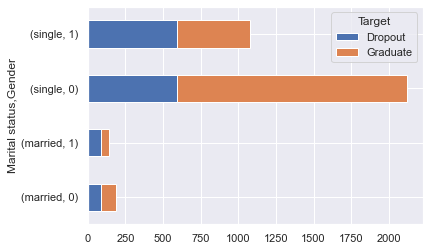

In [ ]:
marital_gender = df
marital_gender = marital_gender.drop(df[df["Marital status"] == "divorced"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "facto union"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "legally separated"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "widower"].index)


marital_gender_plot = pd.crosstab([marital_gender["Marital status"],
                        marital_gender["Gender"]], # categories to cross tabulate
                       marital_gender["Target"]) # how to group
print(marital_gender_plot)

marital_gender_plot.plot(kind='barh', stacked=True)
plt.show()

Target                 Dropout  Graduate
Marital status Gender                   
married        0            89        96
               1            90        52


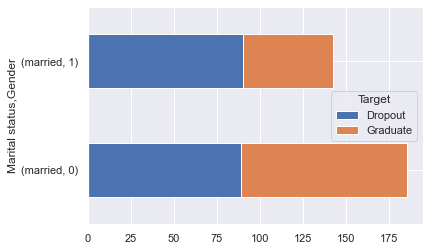

In [ ]:
marital_gender = df
marital_gender = marital_gender.drop(df[df["Marital status"] == "divorced"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "facto union"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "legally separated"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "widower"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "single"].index)


marital_gender_plot = pd.crosstab([marital_gender["Marital status"],
                        marital_gender["Gender"]], # categories to cross tabulate
                       marital_gender["Target"]) # how to group
print(marital_gender_plot)

marital_gender_plot.plot(kind='barh', stacked=True)
plt.show()

In [ ]:
df_subset = df[["Marital status", "Gender", "Target"]]
df_grouped = df_subset.groupby(by=["Marital status", "Gender"])

print(df_grouped.count())

                          Target
Marital status    Gender        
divorced          0           55
                  1           20
facto union       0           17
                  1            5
legally separated 0            4
                  1            1
married           0          185
                  1          142
single            0         2119
                  1         1080
widower           0            1
                  1            1


In [ ]:
# first group the data
df_marital = df.groupby(by=["Marital status", "Gender"])

# tabulate survival rates of each group
# survival_rate = df_marital.Survived.sum() / df_grouped.Survived.count()

# show in a bar chart using builtin pandas API
ax = df_marital.plot(kind='barh')
plt.title('Survival Percentages by Class and Age Range')
plt.show()

<AxesSubplot:>

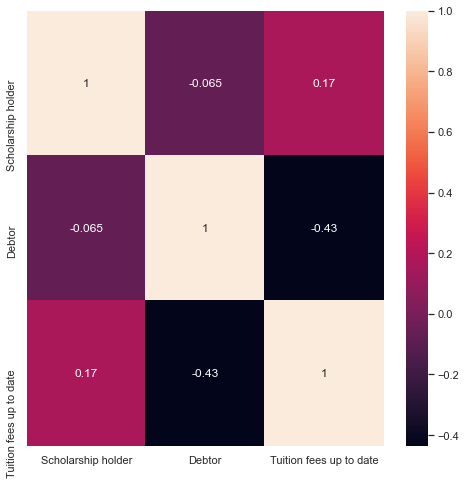

In [ ]:
# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated? 

df_heatmap = df[["Scholarship holder", "Debtor", "Tuition fees up to date"]]

cmap = sb.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(df_heatmap.corr(), cmap=cmap, annot=True)

# f.tight_layout()